In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
import pandas as pd

In [4]:

from google.colab import files

uploaded = files.upload()

Saving training_set (1).csv to training_set (1).csv


In [6]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['training_set (1).csv']))
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [7]:
#EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
N=df.isna().sum()
N

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
x=df.drop(['SalePrice'],axis=1)
y=df['SalePrice']

In [11]:
#Pre-Processing via Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
cat=[]
con=[]

for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [14]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [16]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OneHotEncoder())])

In [17]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])

In [18]:
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'Bsm...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

In [19]:
x1=pd.DataFrame(pre.fit_transform(x).toarray(),columns=pre.get_feature_names_out())
x1

,num_pipe__Id,num_pipe__MSSubClass,num_pipe__LotFrontage,num_pipe__LotArea,num_pipe__OverallQual,num_pipe__OverallCond,num_pipe__YearBuilt,num_pipe__YearRemodAdd,num_pipe__MasVnrArea,num_pipe__BsmtFinSF1,...,cat_pipe__SaleType_ConLw,cat_pipe__SaleType_New,cat_pipe__SaleType_Oth,cat_pipe__SaleType_WD,cat_pipe__SaleCondition_Abnorml,cat_pipe__SaleCondition_AdjLand,cat_pipe__SaleCondition_Alloca,cat_pipe__SaleCondition_Family,cat_pipe__SaleCondition_Normal,cat_pipe__SaleCondition_Partial
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1.723747,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1.726120,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.728492,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
x1.shape

(1460, 288)

In [21]:
#Split The Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=21)

In [24]:
#Model Creation

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
nn=Sequential()

In [43]:
#Create the architecture
#input layer
nn.add(Dense(300,input_dim=x_train.shape[1],activation='relu'))

#hidden layer
nn.add(Dense(500,activation='relu'))
nn.add(Dense(500,activation='relu'))
nn.add(Dense(500,activation='relu'))
#nn.add(Dense(500,activation='relu'))

#output layer , linear since using regression
nn.add(Dense(1,activation='linear'))

In [44]:
nn.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [ ]:
hist=nn.fit(x_train,y_train,validation_split=0.1,epochs=30)

Epoch 1/30
33/33 [==============================] - 3s 103ms/step - loss: 8587216.0000 - mae: 2177.9148 - val_loss: 353311744.0000 - val_mae: 13690.8281
Epoch 2/30
33/33 [==============================] - 2s 75ms/step - loss: 11364940.0000 - mae: 2431.1272 - val_loss: 351493632.0000 - val_mae: 13583.8418
Epoch 3/30
33/33 [==============================] - 2s 69ms/step - loss: 6622175.5000 - mae: 1912.3429 - val_loss: 349855520.0000 - val_mae: 13514.4766
Epoch 4/30
33/33 [==============================] - 2s 74ms/step - loss: 5882158.0000 - mae: 1713.1442 - val_loss: 359548064.0000 - val_mae: 13696.0225
Epoch 5/30
33/33 [==============================] - 2s 70ms/step - loss: 3954548.2500 - mae: 1439.9515 - val_loss: 355108416.0000 - val_mae: 13587.6904
Epoch 6/30
33/33 [==============================] - 2s 58ms/step - loss: 3457779.5000 - mae: 1306.0708 - val_loss: 357331328.0000 - val_mae: 13700.4443
Epoch 7/30
33/33 [==============================] - 2s 60ms/step - loss: 4314831.0000 

In [33]:
# Model Evaluation

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [50]:
#Train Data Evaluation
y_pred_train=nn.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
mae=mean_absolute_error(y_train,y_pred_train)
r=r2_score(y_train,y_pred_train)
rmse=mse**0.5

print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2:',r)

37/37 [==============================] - 0s 12ms/step
MSE: 76557560.74472001
RMSE: 8749.717752288929
MAE: 5806.394036279966
R2: 0.9876299108011168


In [51]:
#Test Data Evaluation
y_pred_test=nn.predict(x_test)

mse1=mean_squared_error(y_pred_test,y_test)
rmse1=mse1**0.5
mae1=mean_absolute_error(y_pred_test,y_test)
r1=r2_score(y_pred_test,y_test)

print('MSE:',mse1)
print('RMSE:',rmse1)
print('MAE:',mae1)
print('R2 Score:',r1)

10/10 [==============================] - 0s 10ms/step
MSE: 1233707496.0386837
RMSE: 35124.17253172925
MAE: 17634.51224047517
R2 Score: 0.7945401791088511


In [37]:
import matplotlib.pyplot as plt

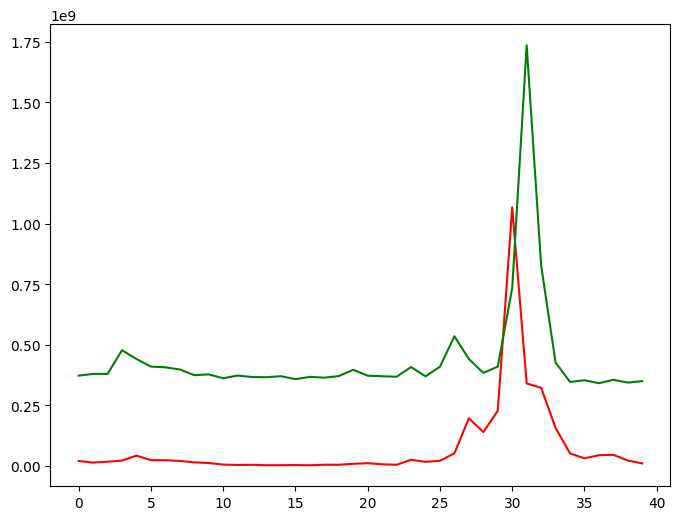

In [54]:
fig=plt.figure(figsize=(8,6))
plt.plot(hist.history['loss'],c='red')
plt.plot(hist.history['val_loss'],c='green')